In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/device_4_dataset.csv')

In [4]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,benign
1,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,benign
2,1.000000,342.0,0.000000e+00,1.000000,342.0,0.0,1.000000,342.0,0.0,1.000000,...,0.0,0.0,6.249414,449.603272,122.911136,449.603272,15107.14730,0.0,0.0,benign
3,1.963325,342.0,4.370000e-11,1.977831,342.0,0.0,1.992555,342.0,0.0,1.999253,...,0.0,0.0,7.248947,434.759286,120.000074,434.759286,14400.01777,0.0,0.0,benign
4,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,benign


In [5]:

data.groupby('type')['type'].count()

type
benign            175240
gafgyt_combo       58152
gafgyt_junk        28349
gafgyt_scan        27859
gafgyt_tcp         92581
gafgyt_udp        105782
mirai_ack          91123
mirai_scan        103621
mirai_syn         118128
mirai_udp         217034
mirai_udpplain     80808
Name: type, dtype: int64

In [6]:
# data.drop(data[data["type"] == "gafgyt_tcp"].index, inplace = True)
# data.drop(data[data["type"] == "gafgyt_udp"].index, inplace = True)
# data.drop(data[data["type"] == "mirai_ack"].index, inplace = True)
# data.drop(data[data["type"] == "mirai_scan"].index, inplace = True)
data.drop(data[data["type"] == "mirai_syn"].index, inplace = True)
data.drop(data[data["type"] == "mirai_udp"].index, inplace = True)
data.drop(data[data["type"] == "mirai_udpplain"].index, inplace = True)

In [7]:
data.groupby('type')['type'].count()

type
benign          175240
gafgyt_combo     58152
gafgyt_junk      28349
gafgyt_scan      27859
gafgyt_tcp       92581
gafgyt_udp      105782
mirai_ack        91123
mirai_scan      103621
Name: type, dtype: int64

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [9]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [10]:
from collections import Counter
print(sorted(Counter(y).items()))

[('benign', 27859), ('gafgyt_combo', 27859), ('gafgyt_junk', 27859), ('gafgyt_scan', 27859), ('gafgyt_tcp', 27859), ('gafgyt_udp', 27859), ('mirai_ack', 27859), ('mirai_scan', 27859)]


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
#standardize numerical columns
# def standardize(df,col):
#     df[col]= (df[col]-df[col].mean())/df[col].std()
# data_st=data.copy()
# for i in (data_st.iloc[:,:-1].columns):
#     standardize (data_st,i)
# data_st.head()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()

In [15]:
#First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=115))
#Second  Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(8, activation='sigmoid', kernel_initializer='random_normal'))

In [16]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7424      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
Total params: 10,168
Trainable params: 10,168
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
5572/5572 [==============================] - 14s 2ms/step - loss: 0.3276 - accuracy: 0.8064 - val_loss: 0.2712 - val_accuracy: 0.8251
Epoch 2/10
5572/5572 [==============================] - 13s 2ms/step - loss: 0.2502 - accuracy: 0.8376 - val_loss: 0.2132 - val_accuracy: 0.8612
Epoch 3/10
5572/5572 [==============================] - 14s 2ms/step - loss: 0.1968 - accuracy: 0.8680 - val_loss: 0.1997 - val_accuracy: 0.8618
Epoch 4/10
5572/5572 [==============================] - 13s 2ms/step - loss: 0.1905 - accuracy: 0.8702 - val_loss: 0.1878 - val_accuracy: 0.8682
Epoch 5/10
5572/5572 [==============================] - 14s 3ms/step - loss: 0.1889 - accuracy: 0.8690 - val_loss: 0.1884 - val_accuracy: 0.8689
Epoch 6/10
5572/5572 [==============================] - 13s 2ms/step - loss: 0.1873 - accuracy: 0.8690 - val_loss: 0.1833 - val_accuracy: 0.8706
Epoch 7/10
5572/5572 [==============================] - 13s 2ms/step - loss: 0.1866 - accuracy: 0.8703 - val_loss: 0.1842 - val_ac

In [18]:
y_pred=classifier.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**





In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

In [20]:
print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.8714301738642737
MCC        : 0.868677287096017


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5440
           1       1.00      0.97      0.99      5553
           2       0.97      1.00      0.99      5537
           3       1.00      1.00      1.00      5542
           4       0.83      0.00      0.00      5574
           5       0.50      1.00      0.67      5663
           6       1.00      1.00      1.00      5585
           7       1.00      1.00      1.00      5681

    accuracy                           0.87     44575
   macro avg       0.91      0.87      0.83     44575
weighted avg       0.91      0.87      0.83     44575



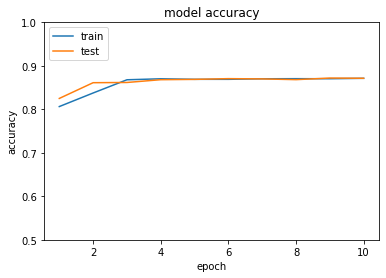

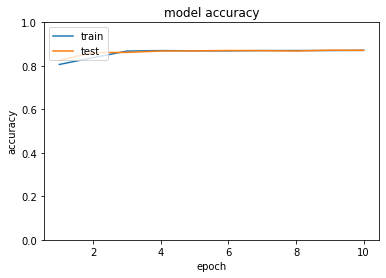

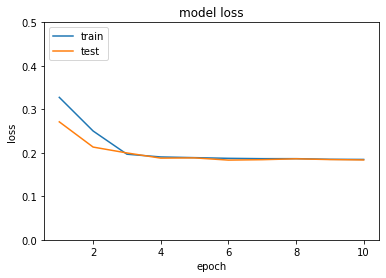

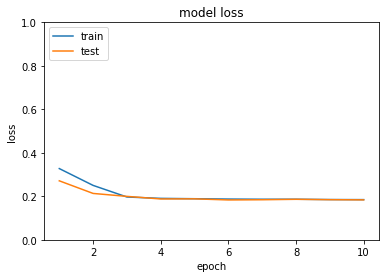

In [22]:
#Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.5, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()




#Loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 0.5])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

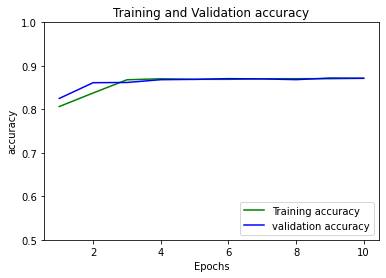

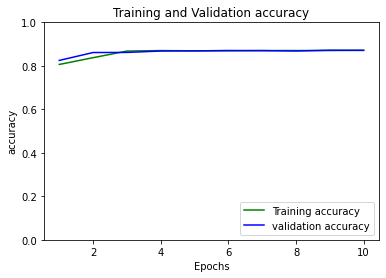

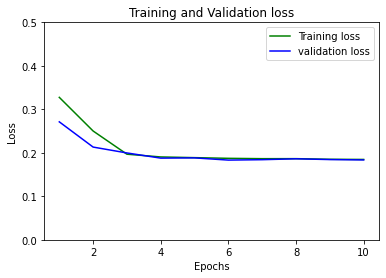

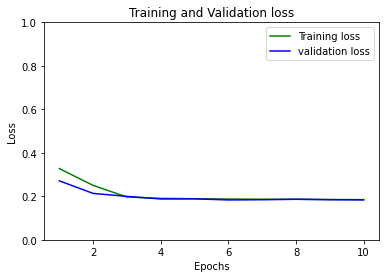

In [23]:
# Accuracy
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#loss
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()



plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

[[5434    0    3    0    0    3    0    0]
 [   0 5409  144    0    0    0    0    0]
 [   0    4 5532    1    0    0    0    0]
 [   3    0    2 5537    0    0    0    0]
 [   0    0    0    0    5 5569    0    0]
 [   0    0    0    0    1 5662    0    0]
 [   0    0    0    0    0    0 5585    0]
 [   0    0    1    0    0    0    0 5680]]


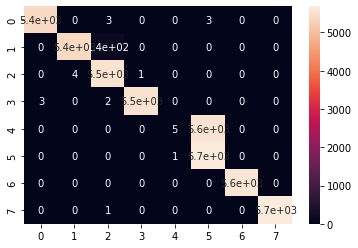

In [24]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)